<a href="https://colab.research.google.com/github/Mainakdeb/e_summit/blob/main/predict_personality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mainakdeb/e_summit.git

Cloning into 'e_summit'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 136 (delta 72), reused 87 (delta 34), pack-reused 0
Receiving objects: 100% (136/136), 8.64 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [2]:
!pip3 install socialreaper==0.3.0

In [3]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

from socialreaper import Twitter
from socialreaper.tools import to_csv
import re
from tqdm import tqdm_notebook
import os
import pandas as pd
import time

In [ ]:
cEXT = pickle.load( open( "/content/e_summit/models/cEXT.p", "rb"))
cNEU = pickle.load( open( "/content/e_summit/models/cNEU.p", "rb"))
cAGR = pickle.load( open( "/content/e_summit/models/cAGR.p", "rb"))
cCON = pickle.load( open( "/content/e_summit/models/cCON.p", "rb"))
cOPN = pickle.load( open( "/content/e_summit/models/cOPN.p", "rb"))
vectorizer_31 = pickle.load( open( "/content/e_summit/models/vectorizer_31.p", "rb"))
vectorizer_30 = pickle.load( open( "/content/e_summit/models/vectorizer_30.p", "rb"))

In [10]:
from googlesearch import search
import re

def get_profile(keyword):
  results = list(search(keyword, num=10))
  profiles = {
      'twitter': '',
    #   'facebook': '',
    #   'linkedin':''
  }
  for r in results:
    if r.find('twitter') != -1 and profiles['twitter'] == '':
      r = re.search(r'https://twitter.com/([^/?]+)', r).group(1)
      profiles['twitter'] = r
    # if r.find('facebook') != -1 and profiles['facebook'] == '':
    #   r = re.search(r'https://www.facebook.com/([^/?]+)', r).group(1)
    #   profiles['facebook'] = r
    # if r.find('linkedin') != -1 and profiles['linkedin'] == '':
    #   r = re.search(r'https://in.linkedin.com/in/([^/?]+)', r).group(1)
    #   profiles['linkedin'] = r
  return profiles

In [11]:
twt = Twitter(app_key="PDz1fZLoCEHcOx035TtLsrcWS", 
              app_secret="Ok1aJBP4nM6g87F3hFiPFY0R0a7qnUNsdIoKZteaAuzYF2yTuF", 
              oauth_token="1292034807057149952-3Mlqa59ZAoqRdACgnW6z4goXUy3vUs", 
              oauth_token_secret="ZZlu7jF3mymeapDxwj19MkqCYF3osQjp48xYEuIL4wRM1")
    
def get_text_from_tweets(user_name):
    tweets = twt.user(user_name, 
                    count=1000, 
                    exclude_replies=False, 
                    include_retweets=True)
        
    to_csv(list(tweets), filename=user_name+'_tweets.csv')

    tweets_df = pd.read_csv(user_name+"_tweets.csv")
    just_tweets=tweets_df[["text"]]
    ##remove urls 
    no_urls = just_tweets['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
    #just_text_from_tweets.head(50)
    no_urls=no_urls.to_frame()

    # convert rows to a string
    tweets_string = ""
    for idx,row in no_urls.iterrows():
        tweets_string += (row['text'] + '. ')

    clean_text = re.sub("[^A-Za-z0-9. ]"," ",tweets_string)
    clean_text = clean_text.strip()
    return(clean_text)


In [19]:
def predict_personality(text):
    sentences = re.split("(?<=[.!?]) +", text)
    text_vector_31 = vectorizer_31.transform(sentences)
    text_vector_30 = vectorizer_30.transform(sentences)
    EXT = cEXT.predict(text_vector_31)
    NEU = cNEU.predict(text_vector_30)
    AGR = cAGR.predict(text_vector_31)
    CON = cCON.predict(text_vector_31)
    OPN = cOPN.predict(text_vector_31)
    return [np.mean(EXT), np.mean(NEU), np.mean(AGR), np.mean(CON), np.mean(OPN)]

In [20]:
def display_results(text, user_name):
    predictions = predict_personality(text)
    #print("predicted personality:", predictions)
    df = pd.DataFrame(dict(r=predictions, theta=['EXT','NEU','AGR', 'CON', 'OPN']))
    attrs = list(df['r'])
    plt.rcParams["figure.figsize"] = (12, 6)
    plt.style.use('ggplot')
    plt.bar(['EXT','NEU','AGR', 'CON', 'OPN'],attrs, color ='green', alpha=0.5)
    plt.xlabel("Attribute")
    plt.ylabel("Tendency")
    plt.title(user_name+"'s Personality Report")
    plt.show()

In [21]:
#try Narendra Modi, Ratan Tata, Chetan Bhagat
user_name = get_profile("Chetan Bhagat")['twitter']
text = get_text_from_tweets(user_name)

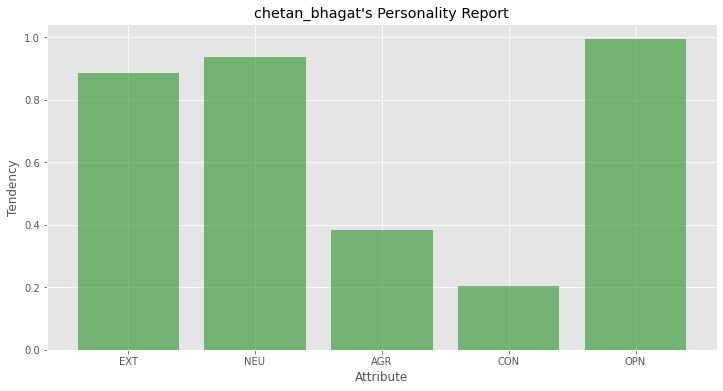

In [22]:
display_results(text=text, user_name=user_name)